In [1]:
import pyarrow.parquet as pq
import pandas as pd
import glob
import duckdb
import os
import matplotlib.pyplot as plt
os.chdir('D:/duckdb/files/FdG/')
 
con = duckdb.connect()
con.execute("PRAGMA threads=2") # enable automatic query parallelization
con.execute("PRAGMA enable_object_cache") # enable caching of parquet metadata

In [2]:
df = (con.execute("select * FROM '*.parquet' where year(delibera) >2022;").df())
df['ATECO'] = [x[:2] for x in df['ATECO']]
pd.options.display.float_format = '{:.0f}'.format

In [3]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

PerRegione=df.groupby('ATECO')['finanziamento'].sum().to_frame().reset_index()
PerRegione

,ATECO,finanziamento
0,10,1560459048
1,11,730740268
2,12,363034436
3,13,388547270
4,14,698526453
...,...,...
71,93,191397719
72,94,776000
73,95,49756685
74,96,273650079


In [4]:
counts = df.value_counts(['regione'])
percent = counts / counts.sum()
fmt = '{:.1%}'.format

pd.set_option('display.max_rows', None)
a=pd.DataFrame({'counts': counts, 'per': percent.map(fmt)})
print(a)

                       counts    per
regione                             
Lombardia               33345  15.6%
Veneto                  29265  13.6%
Campania                19911   9.3%
Sicilia                 19056   8.9%
Toscana                 16871   7.9%
Piemonte                16395   7.6%
Lazio                   15493   7.2%
Emilia Romagna          13868   6.5%
Puglia                  11918   5.6%
Marche                   9103   4.2%
Sardegna                 4825   2.3%
Abruzzo                  4825   2.3%
Umbria                   4139   1.9%
Friuli Venezia Giulia    4022   1.9%
Calabria                 3276   1.5%
Trentino Alto Adige      2636   1.2%
Liguria                  2537   1.2%
Basilicata               1448   0.7%
Molise                    894   0.4%
Valle d'Aosta             583   0.3%


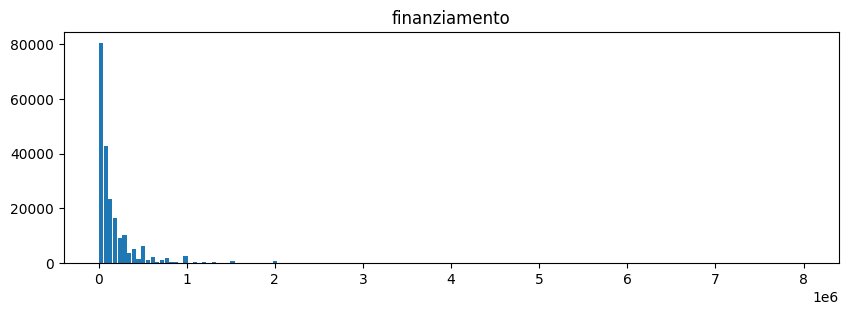

In [5]:
df[['finanziamento']].hist(bins=150,figsize=(10, 3),grid = False, rwidth = 0.9,)
plt.show()

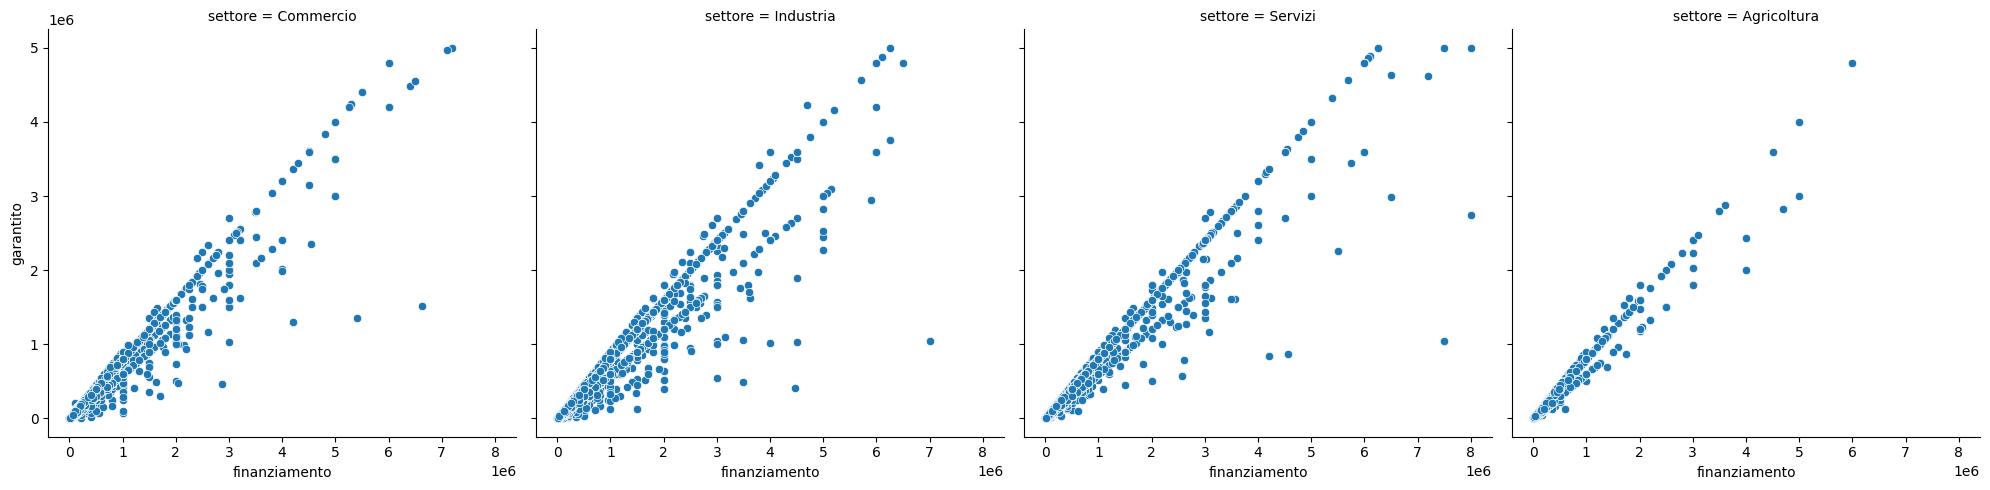

In [7]:
import seaborn as sns  
sns.relplot(x = "finanziamento", y = "garantito", data = df, kind = "scatter",   col = "settore", markers = 'regione') #kind =line
plt.show()

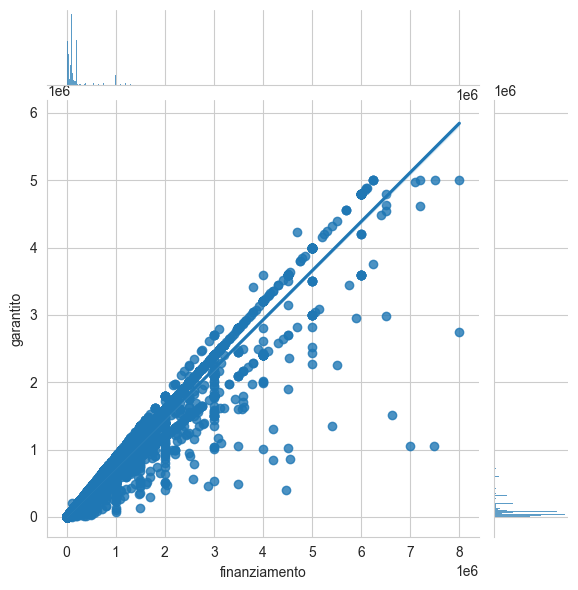

In [8]:
sns.set_style("whitegrid")
g = sns.JointGrid(x="finanziamento",
                  y="garantito",
                  data = df)
g.plot(sns.regplot, sns.histplot)
plt.show()

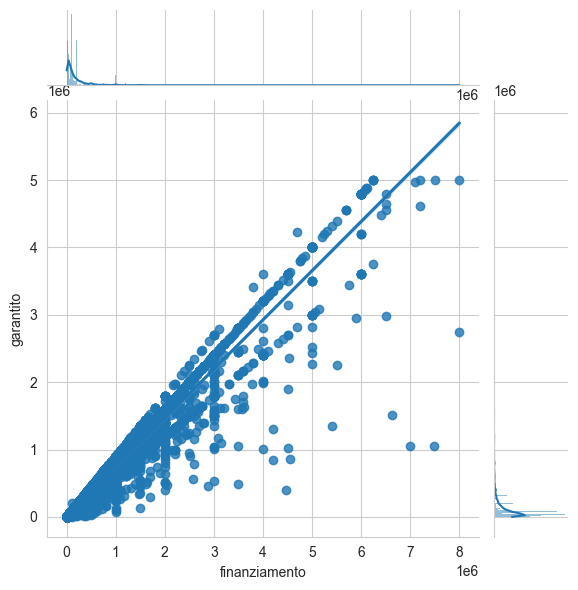

<Figure size 640x480 with 0 Axes>

In [9]:
sns.jointplot(x = "finanziamento",
              y = "garantito",
              kind = 'reg', #reg, resid
              data = df)
plt.show()
plt.clf()

https://medium.com/the-researchers-guide/generate-publication-ready-plots-using-seaborn-library-part-1-f4c9a6d0489c

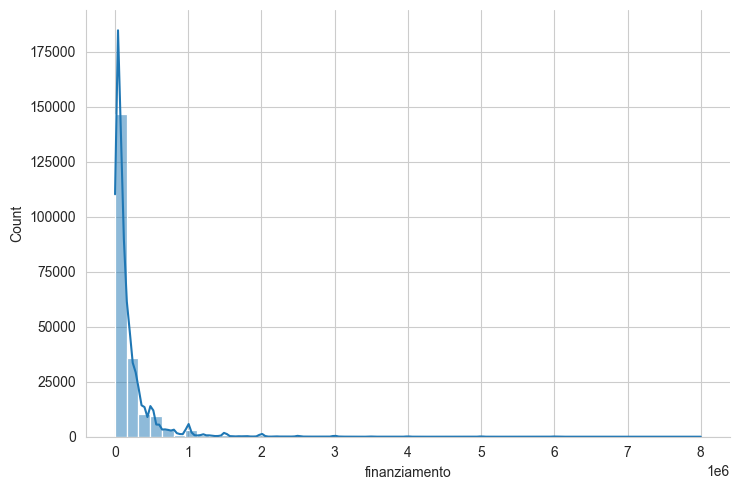

In [10]:
sns.displot(data=df, x="finanziamento", kind="hist", kde = True, bins = 50, aspect=1.5) # Histogram + KDE

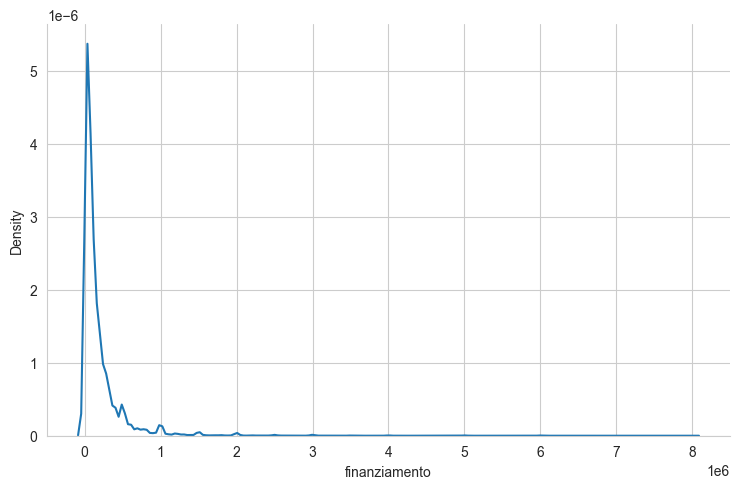

In [11]:
sns.displot(data=df, x="finanziamento", kind="kde", aspect=1.5) # Gaussian Kernel Density Estimation (KDE) Plot

## Stripplot

A strip plot could be a good alternative to box or violin plot when we want to display all observations but this work fine when we have a small dataset.

Let’s see how the tips are distributed over different days.

It comes handy if you have a figure (fig) and axis (ax) object. You could get it by using plt.subplots( ) function obtained from Matplotlib library. Here we fixed the figure size to 10 x 6. We supplied day on the x-axis and tip on the y-axis. You can add little bit randomness using jitter = True so that you could see the observations if they are overlapping. Here, I have added a point size of 8.

To make the plot visually aesthetic, I have removed the top and right spines using: sns.despine(right = True).

C:\Users\paolo\AppData\Local\Temp\ipykernel_13404\4038103471.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x = "settore",


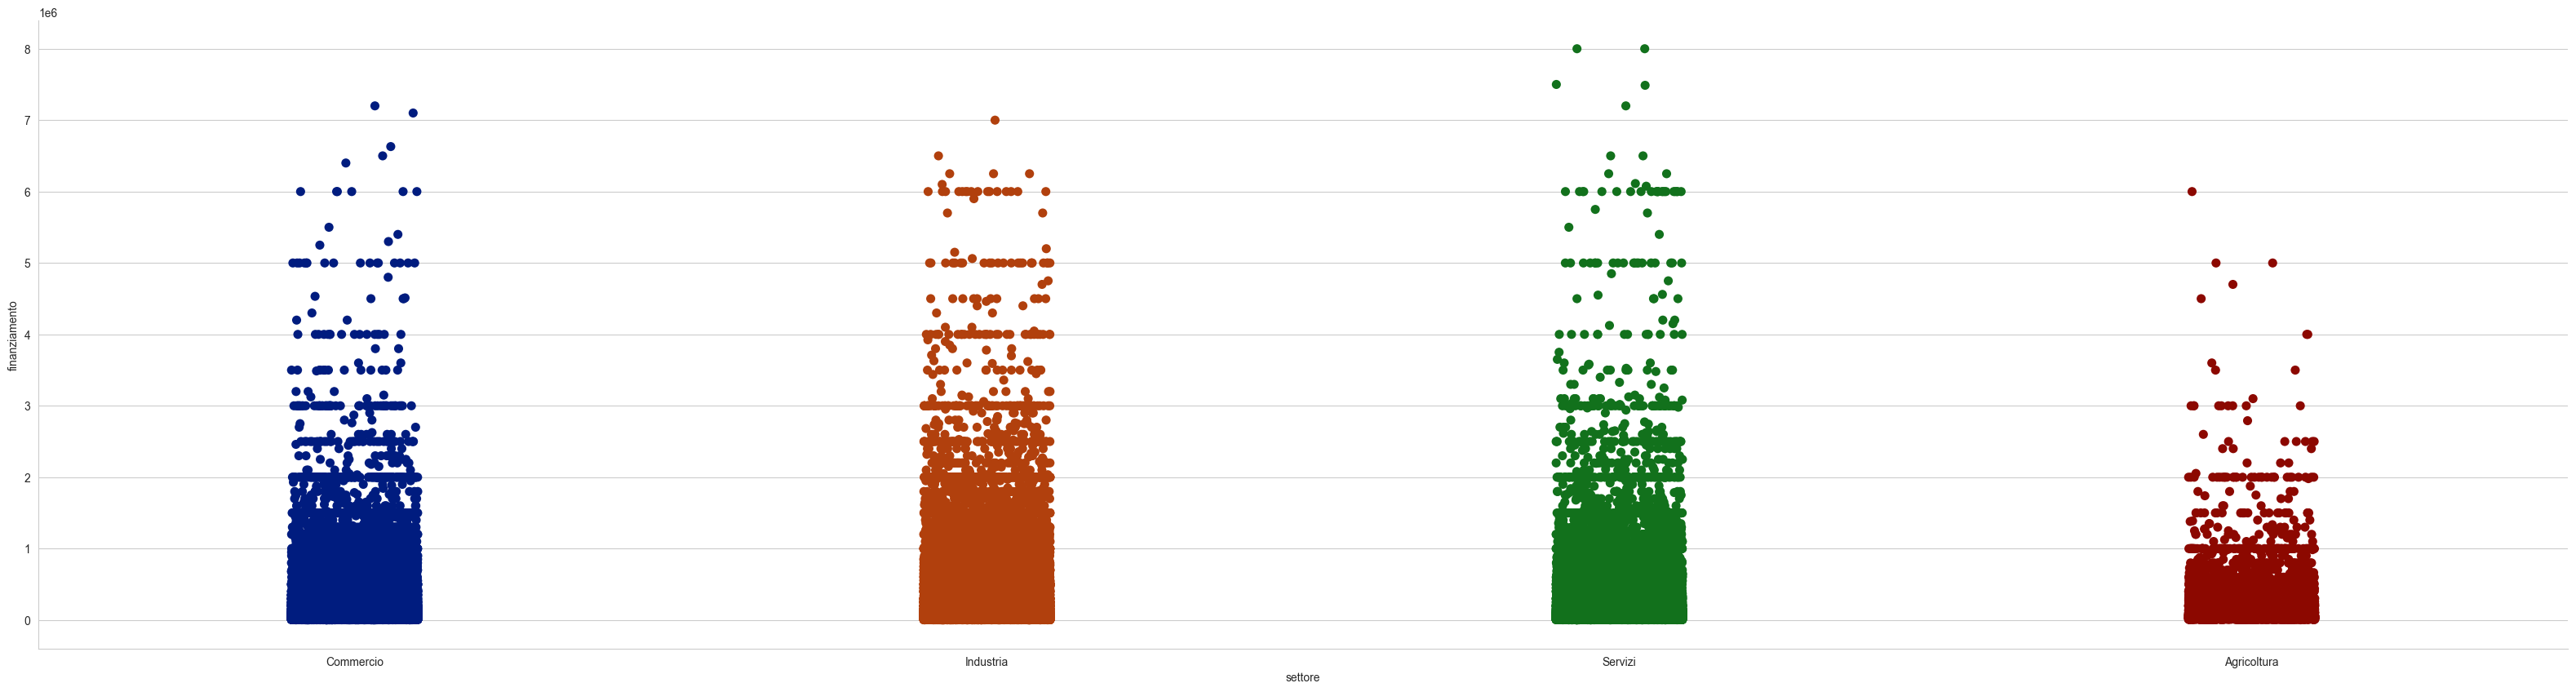

In [13]:
fig, ax = plt.subplots(figsize=(40, 10))
sns.stripplot(x = "settore",
              y = "finanziamento",
              data = df,
              jitter = True,
              ax = ax,
              s = 8,
             palette='dark')
sns.despine(right = True)
plt.show()

C:\Users\paolo\AppData\Local\Temp\ipykernel_26600\1681146874.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = "riserva",


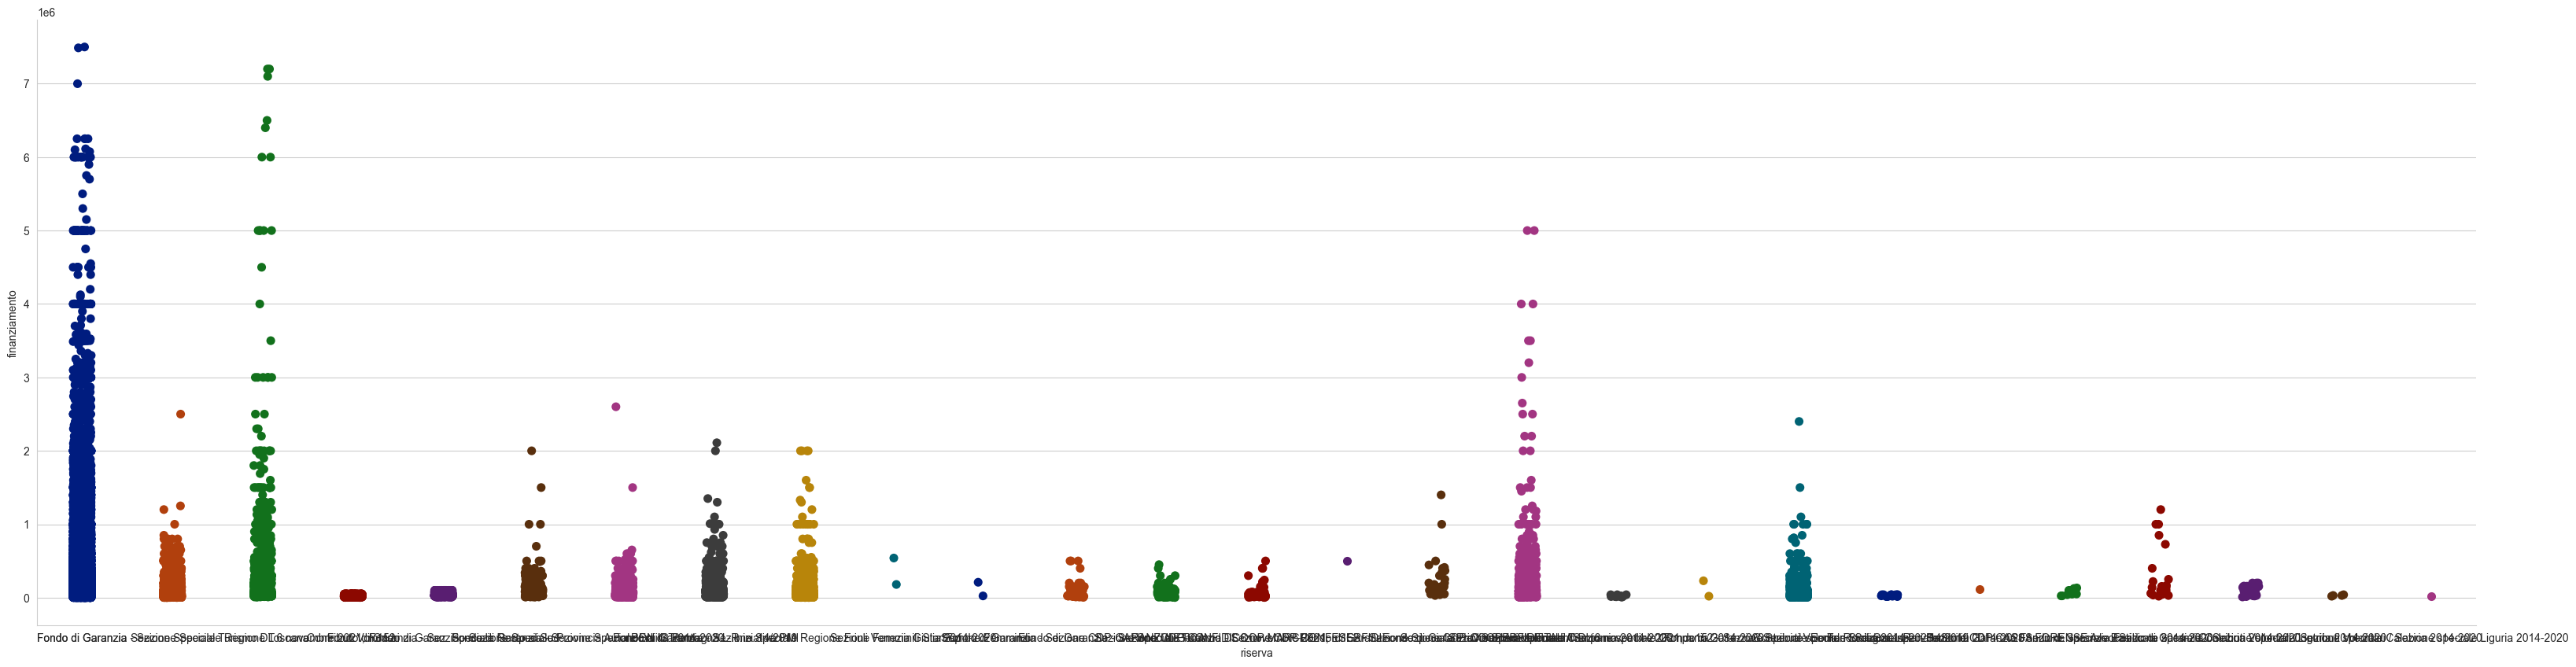

In [9]:
fig, ax = plt.subplots(figsize=(40, 10))

sns.stripplot(x = "riserva",
              y = "finanziamento",
              data = df,
              jitter = True,
              ax = ax,
              s = 8,
             palette='dark')
sns.despine(right = True)

plt.show()

C:\Users\paolo\AppData\Local\Temp\ipykernel_13404\306492366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x = "settore",


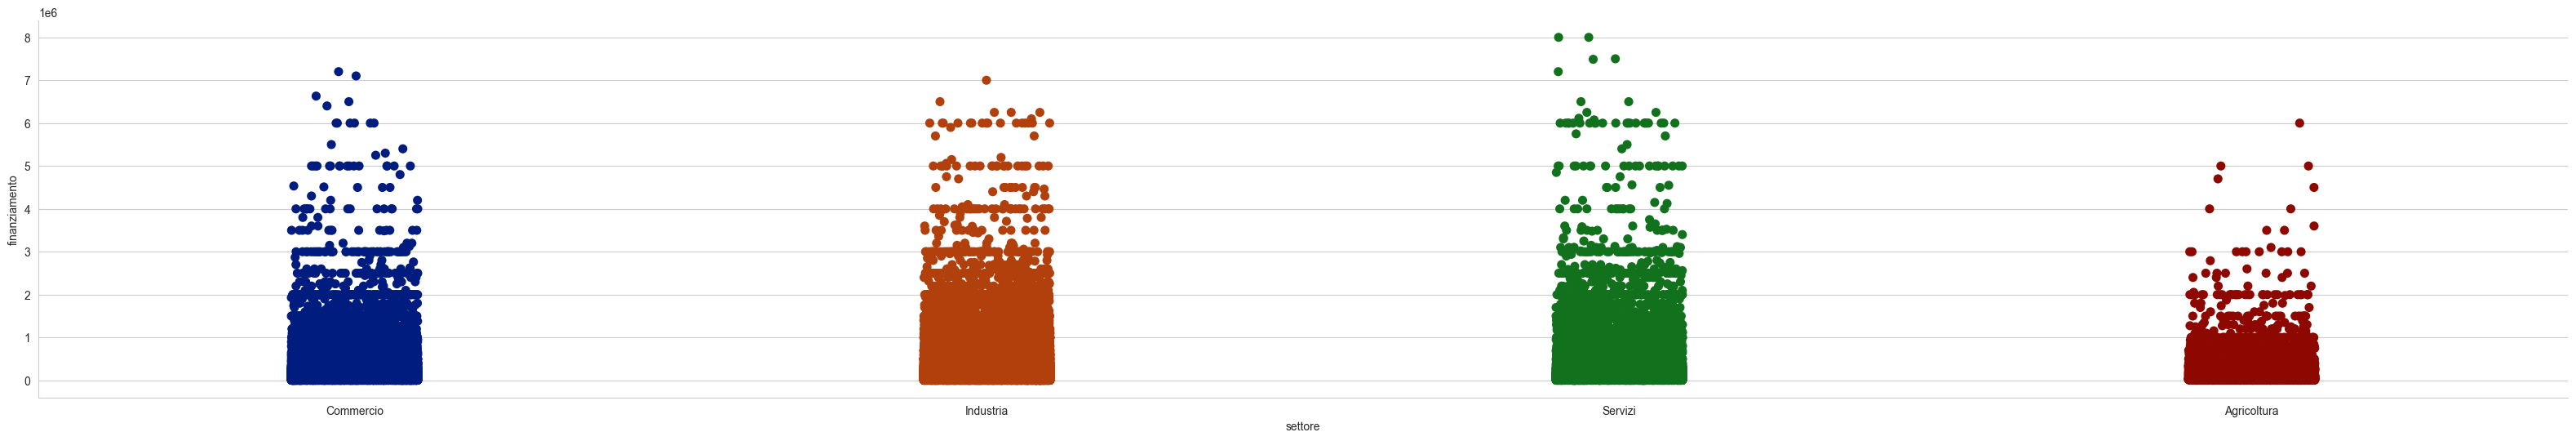

In [14]:
fig, ax = plt.subplots(figsize=(40, 6))
sns.stripplot(x = "settore",
              y = "finanziamento",
              data = df,
              jitter = True,
              ax = ax,
              s = 8,palette='dark')
sns.despine(right = True)
plt.show()

fig, ax = plt.subplots(figsize=(40, 6))
sns.swarmplot(x = "regione",
              y = "finanziamento",
              data = df,
              ax = ax,
              s = 8)
sns.despine(right = True)
plt.show()

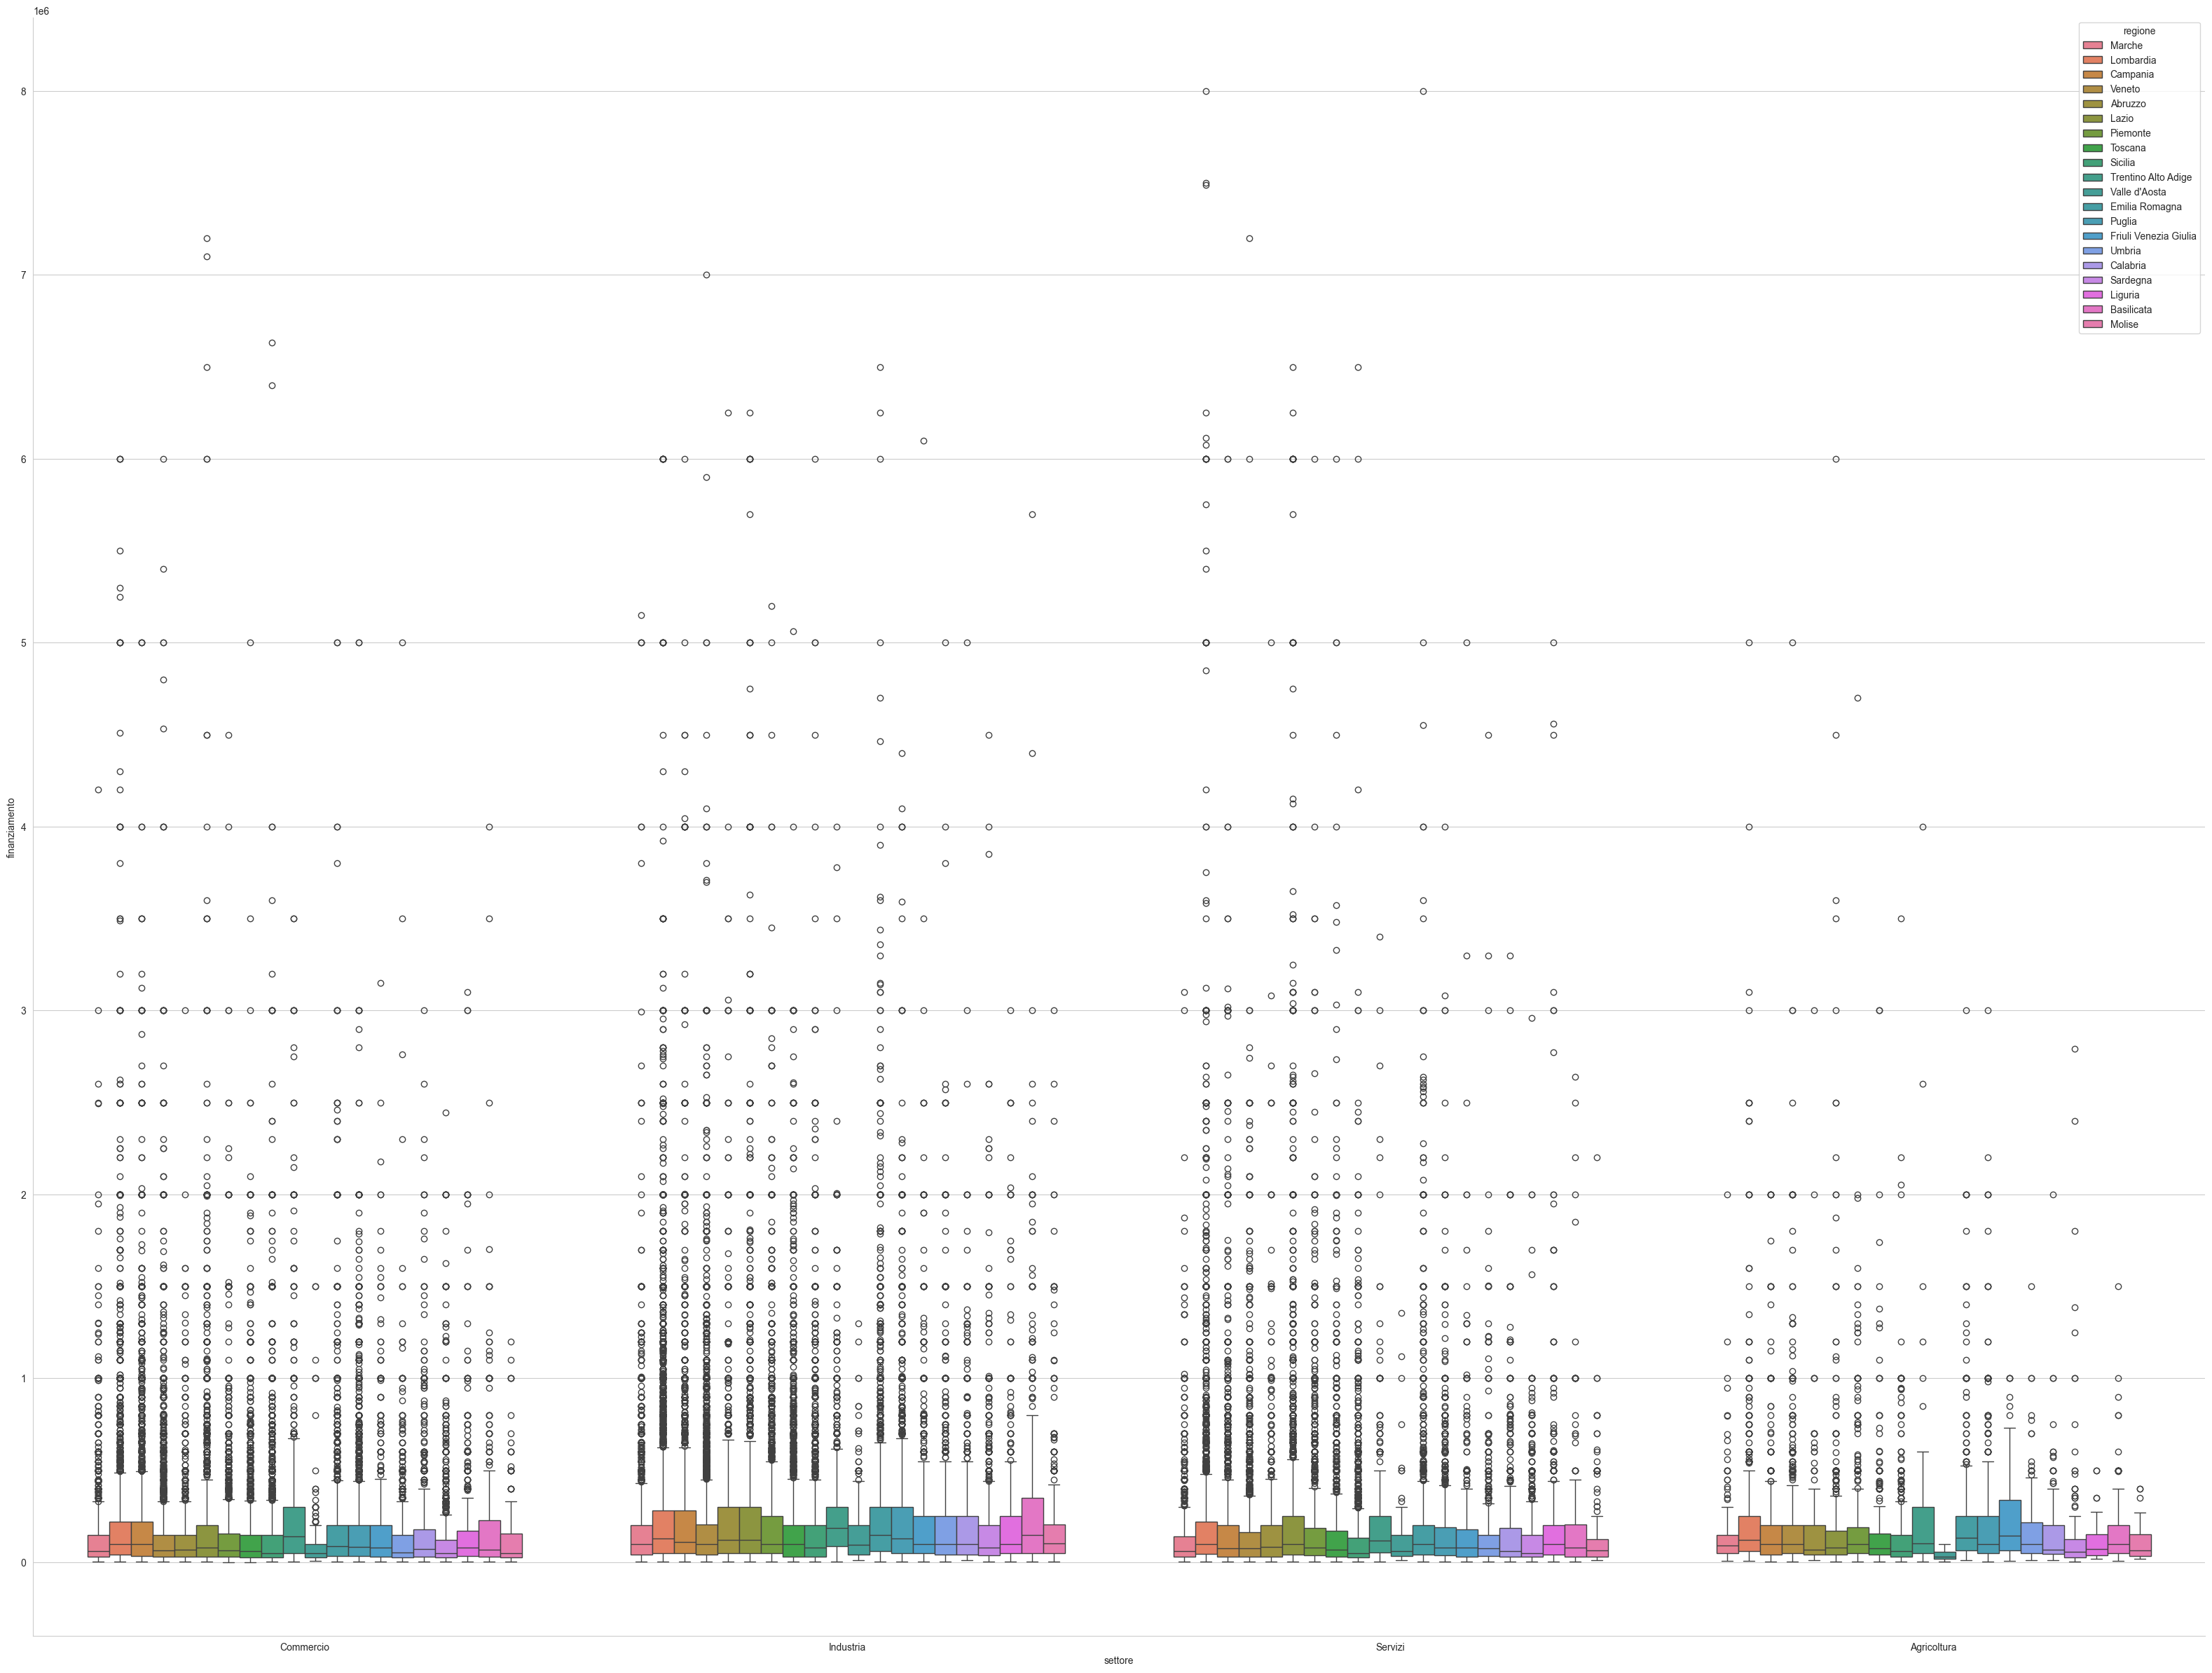

In [15]:
fig, ax = plt.subplots(figsize=(40, 30))
sns.boxplot(x = "settore",
            y = "finanziamento",
            data = df,
            ax = ax,
            hue = "regione")
sns.despine(right = True)
plt.show()

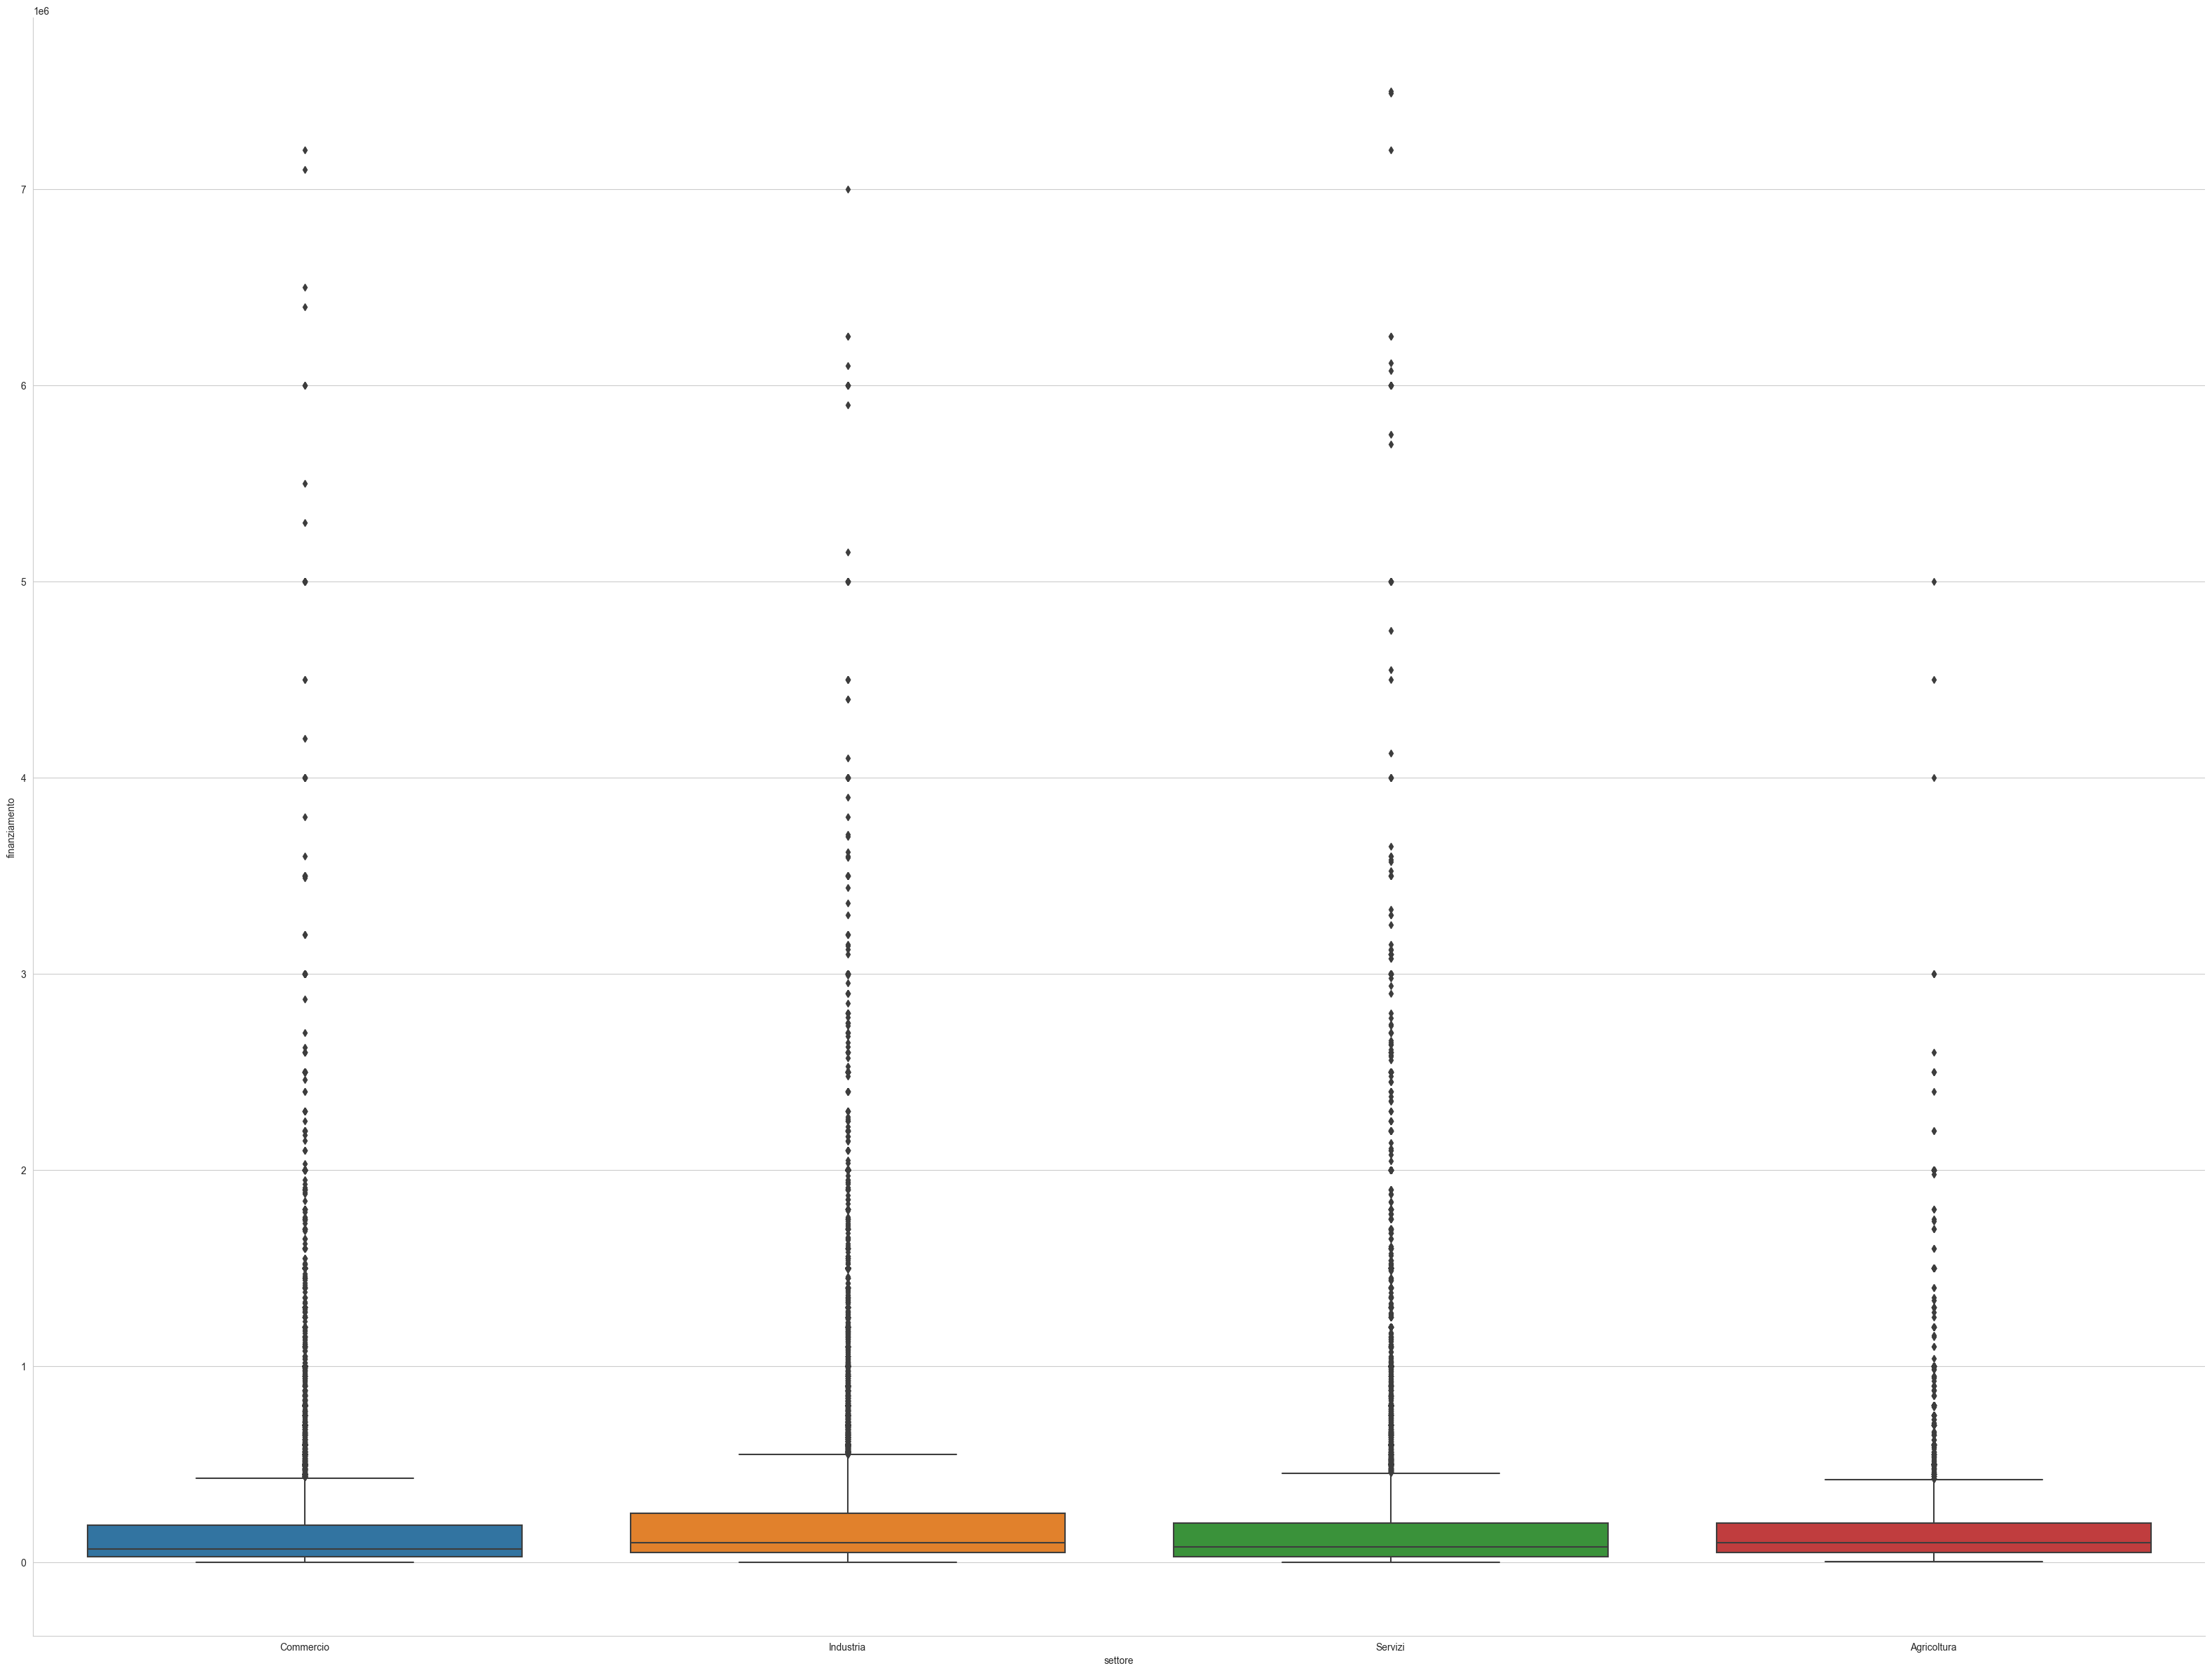

In [16]:
fig, ax = plt.subplots(figsize=(40, 30))
sns.boxplot(x = "settore",
            y = "finanziamento",
            data = df,
            ax = ax)
sns.despine(right = True)
plt.show()

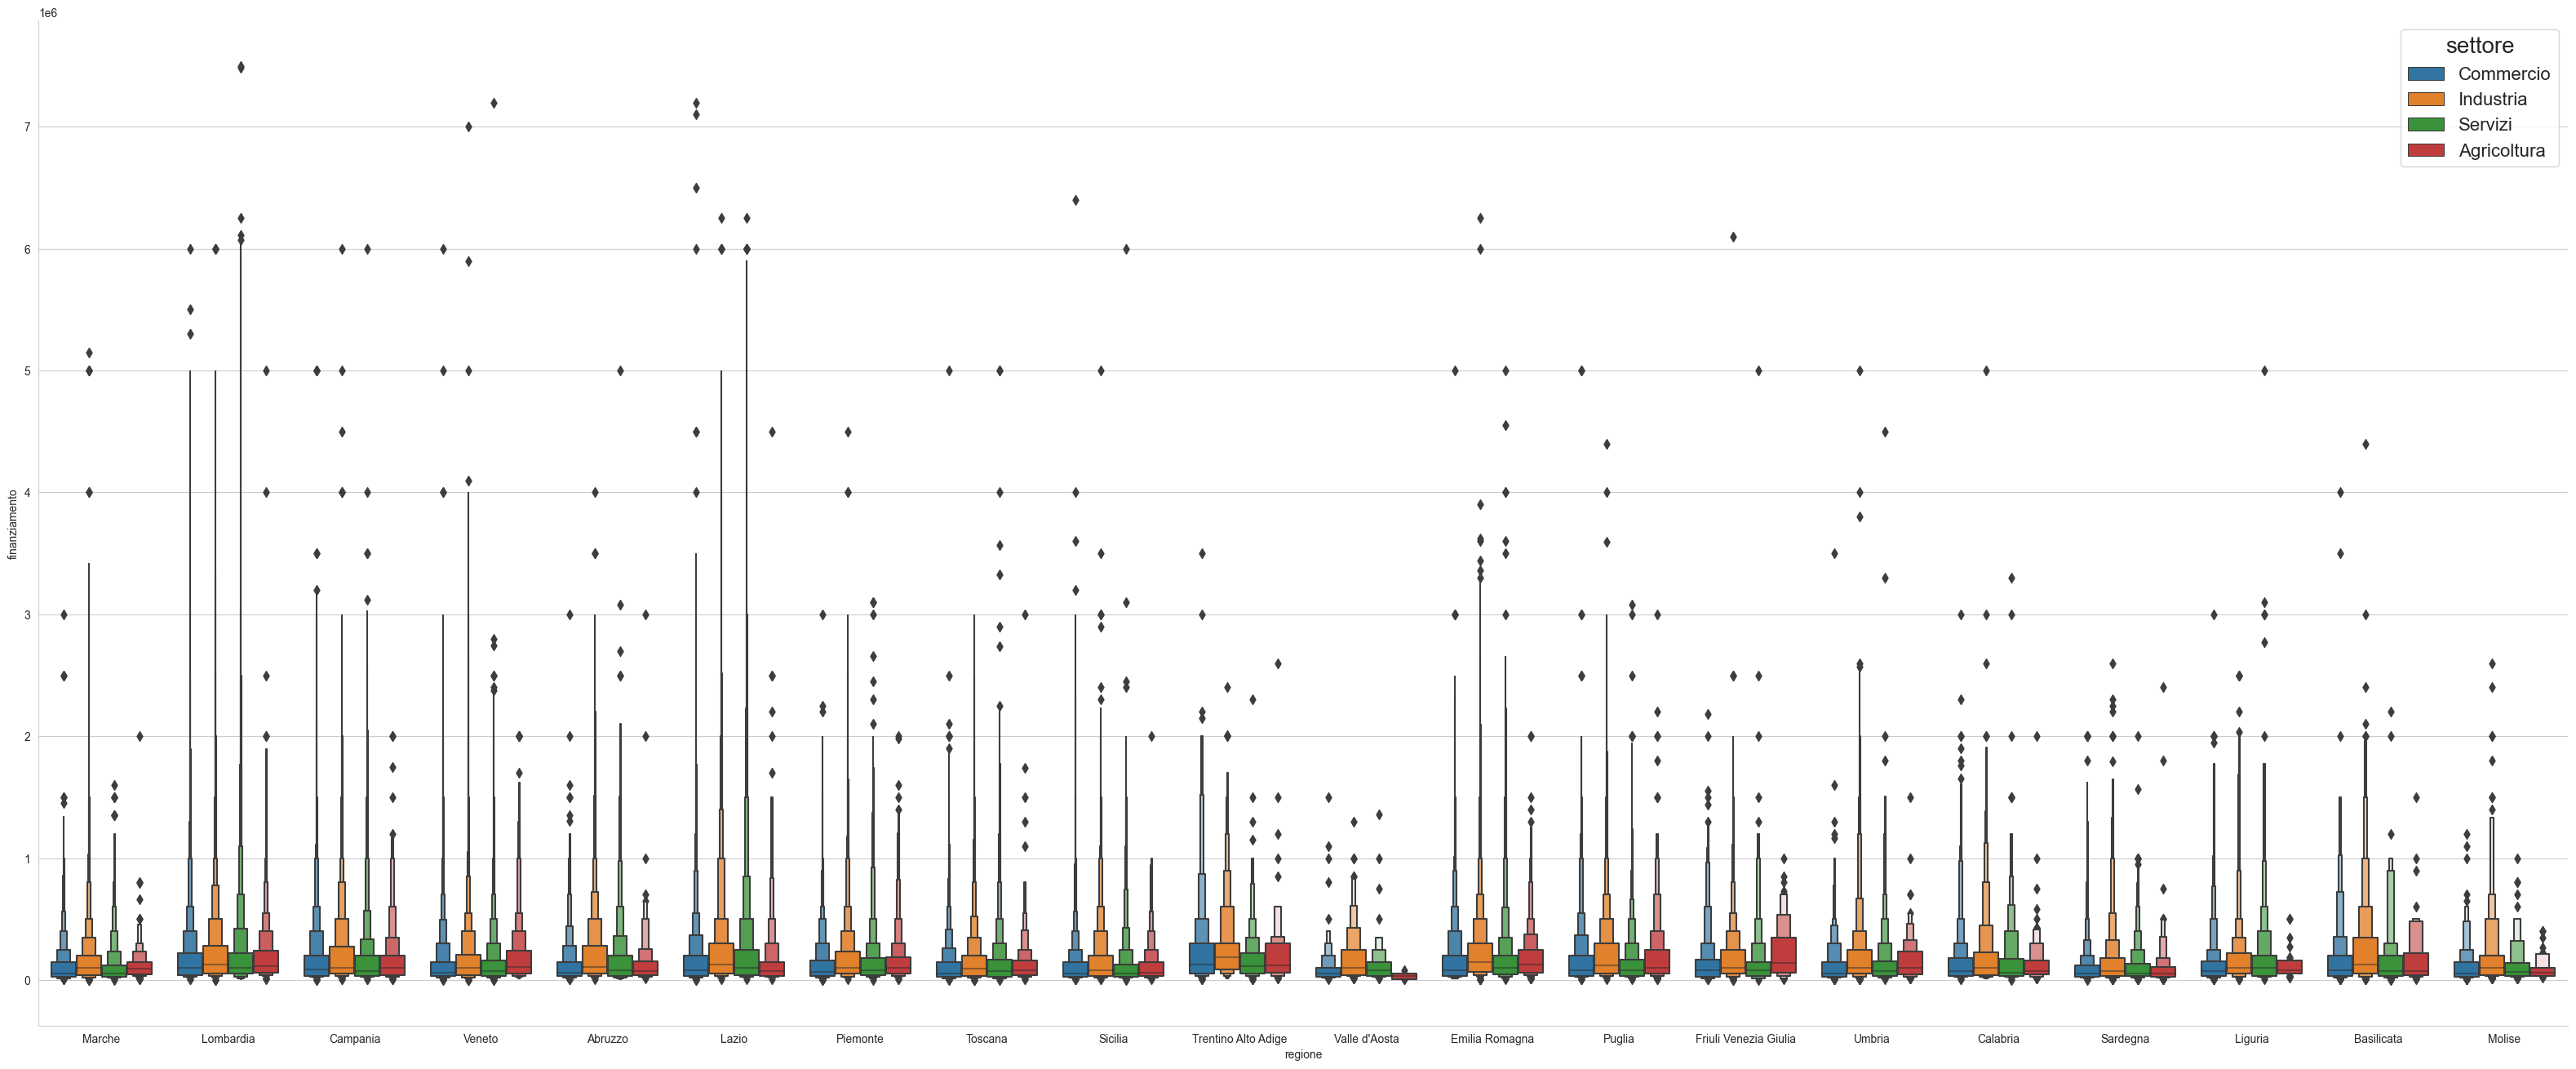

In [17]:
fig, ax = plt.subplots(figsize=(40, 16))
sns.boxenplot(x = "regione",
              y = "finanziamento",
              data = df,
              ax = ax,
              hue = "settore",
              palette="tab10")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title='settore', fontsize=16, title_fontsize=20)
sns.despine(right = True)
plt.show()

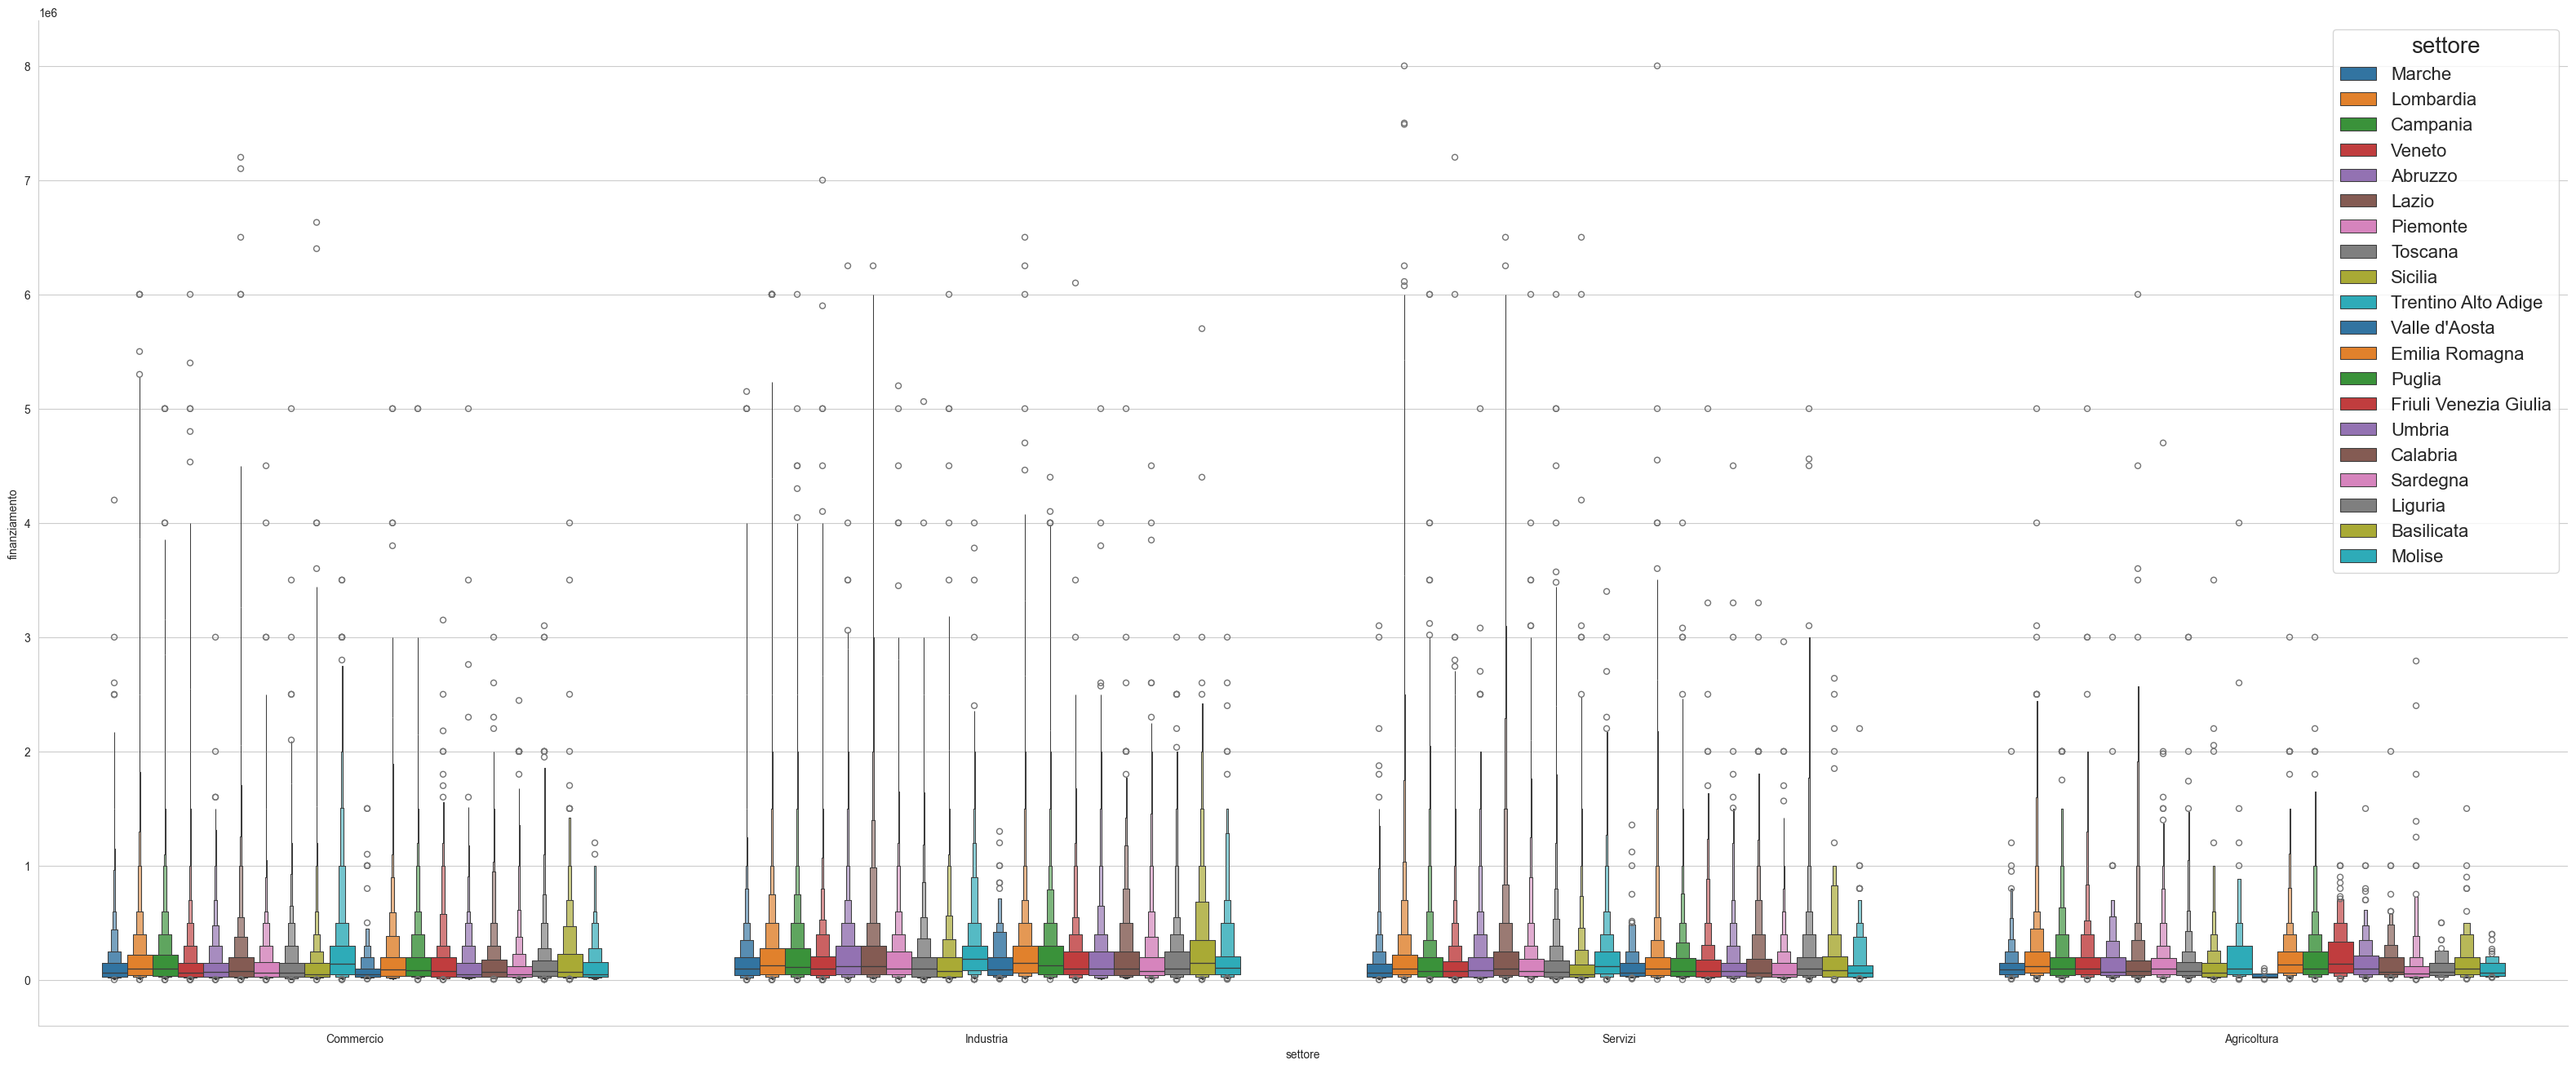

In [16]:
fig, ax = plt.subplots(figsize=(40, 16))
sns.boxenplot(x = "settore",
              y = "finanziamento",
              data = df,
              ax = ax,
              hue = "regione",
              palette="tab10")
handles, labels = ax.get_legend_handles_labels()
ax.legend(title='settore', fontsize=16, title_fontsize=20)
sns.despine(right = True)
plt.show()

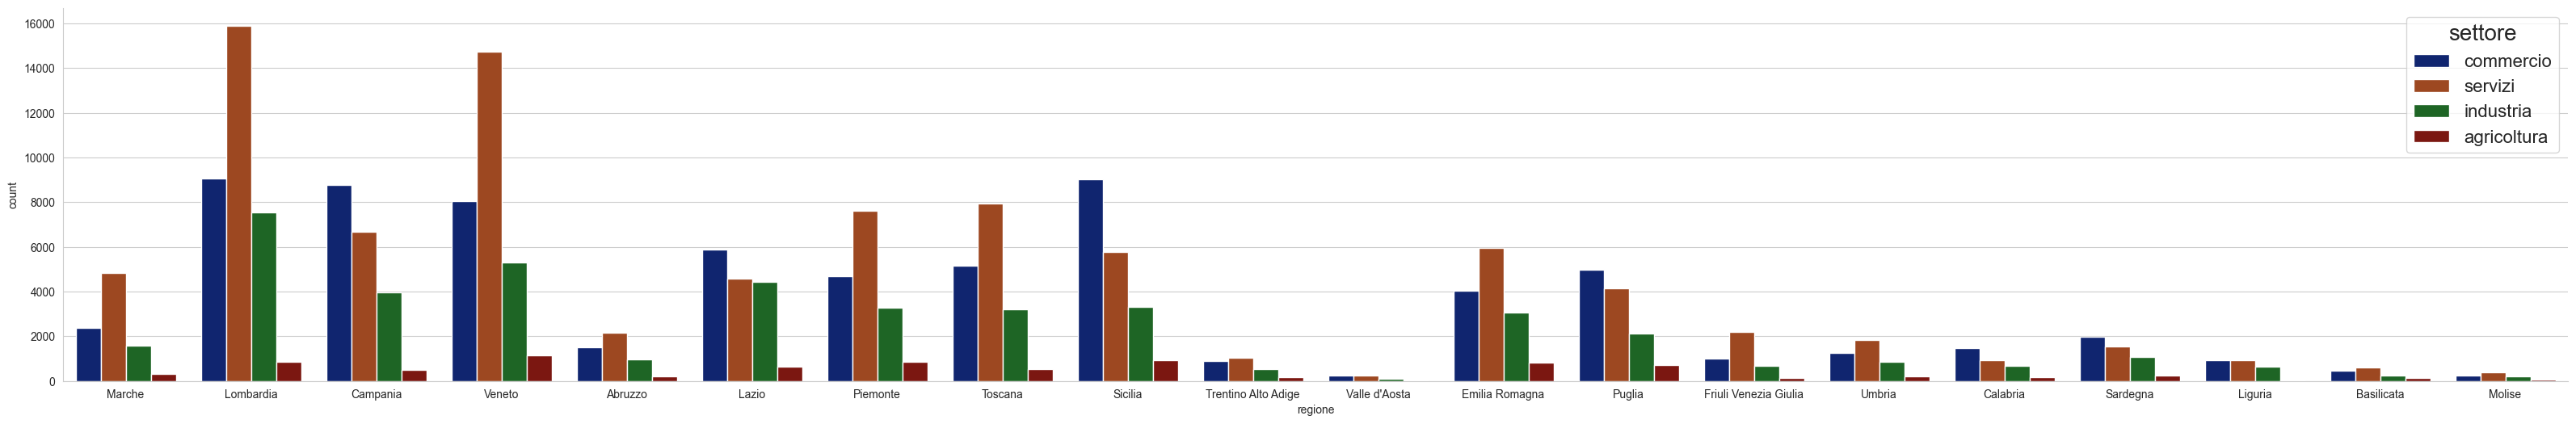

In [17]:
fig, ax = plt.subplots(figsize=(40, 6))
sns.countplot(x = "regione",
              data = df,
              ax = ax,
              hue = "settore",
              palette="dark")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["commercio", "servizi","industria","agricoltura"], title='settore', fontsize=16, title_fontsize=20)
sns.despine(right = True)
plt.show()

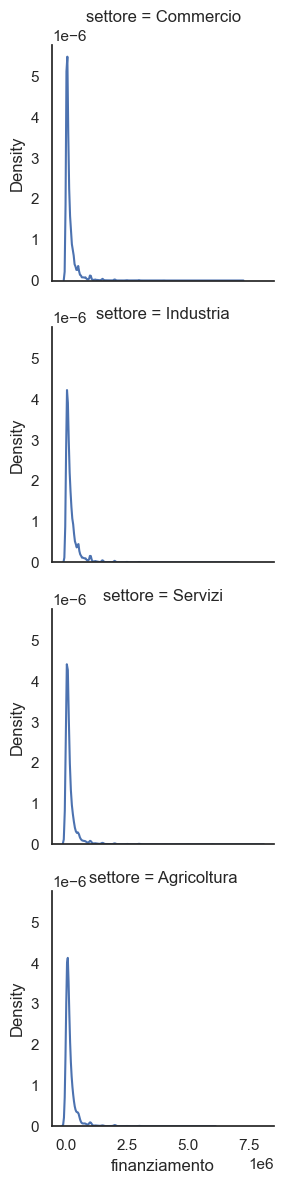

In [18]:
# https://python.plainenglish.io/ridge-plots-with-pythons-seaborn-4de5725881af
sns.set_theme(style="white")
g = sns.FacetGrid(df, row="settore")
g.map_dataframe(sns.kdeplot, x="finanziamento")

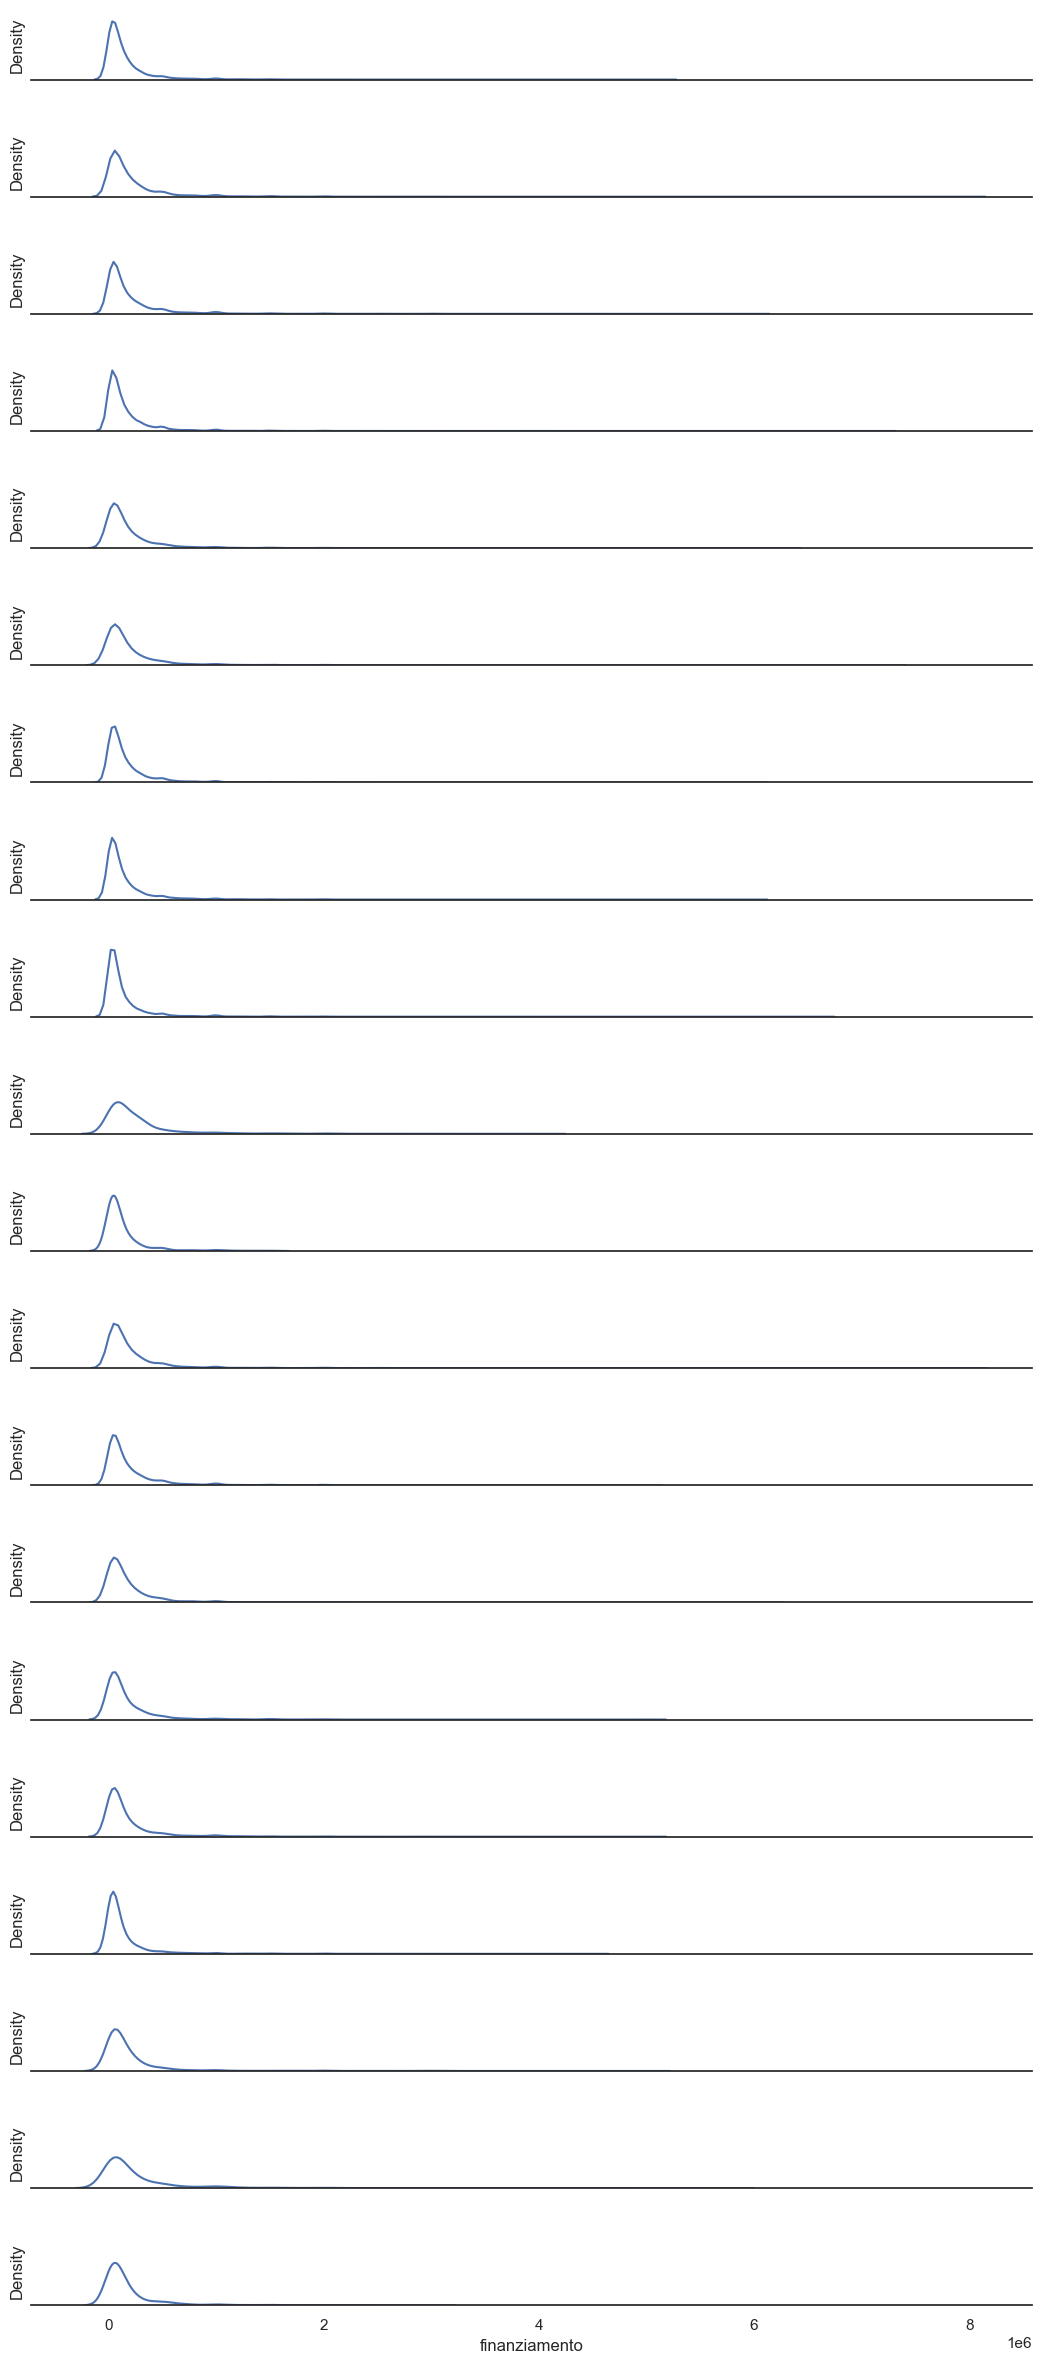

In [19]:
sns.set_theme(style="white")
g = sns.FacetGrid(df, row="regione", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="finanziamento")
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

In [42]:
df.columns

Index(['impresa', 'CF', 'intervento', 'garantito', 'riserva', 'delibera',
       'finanziamento', 'ATECO', 'anno', 'settore', 'regione', 'prov',
       'comune', 'processo'],
      dtype='object')

C:\Users\paolo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
C:\Users\paolo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
C:\Users\paolo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:854: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)
C:\Users\paolo\AppData\Local\Packages\PythonSoftwareFounda

Text(0.5, 0.98, 'Fondo di Garanzia')

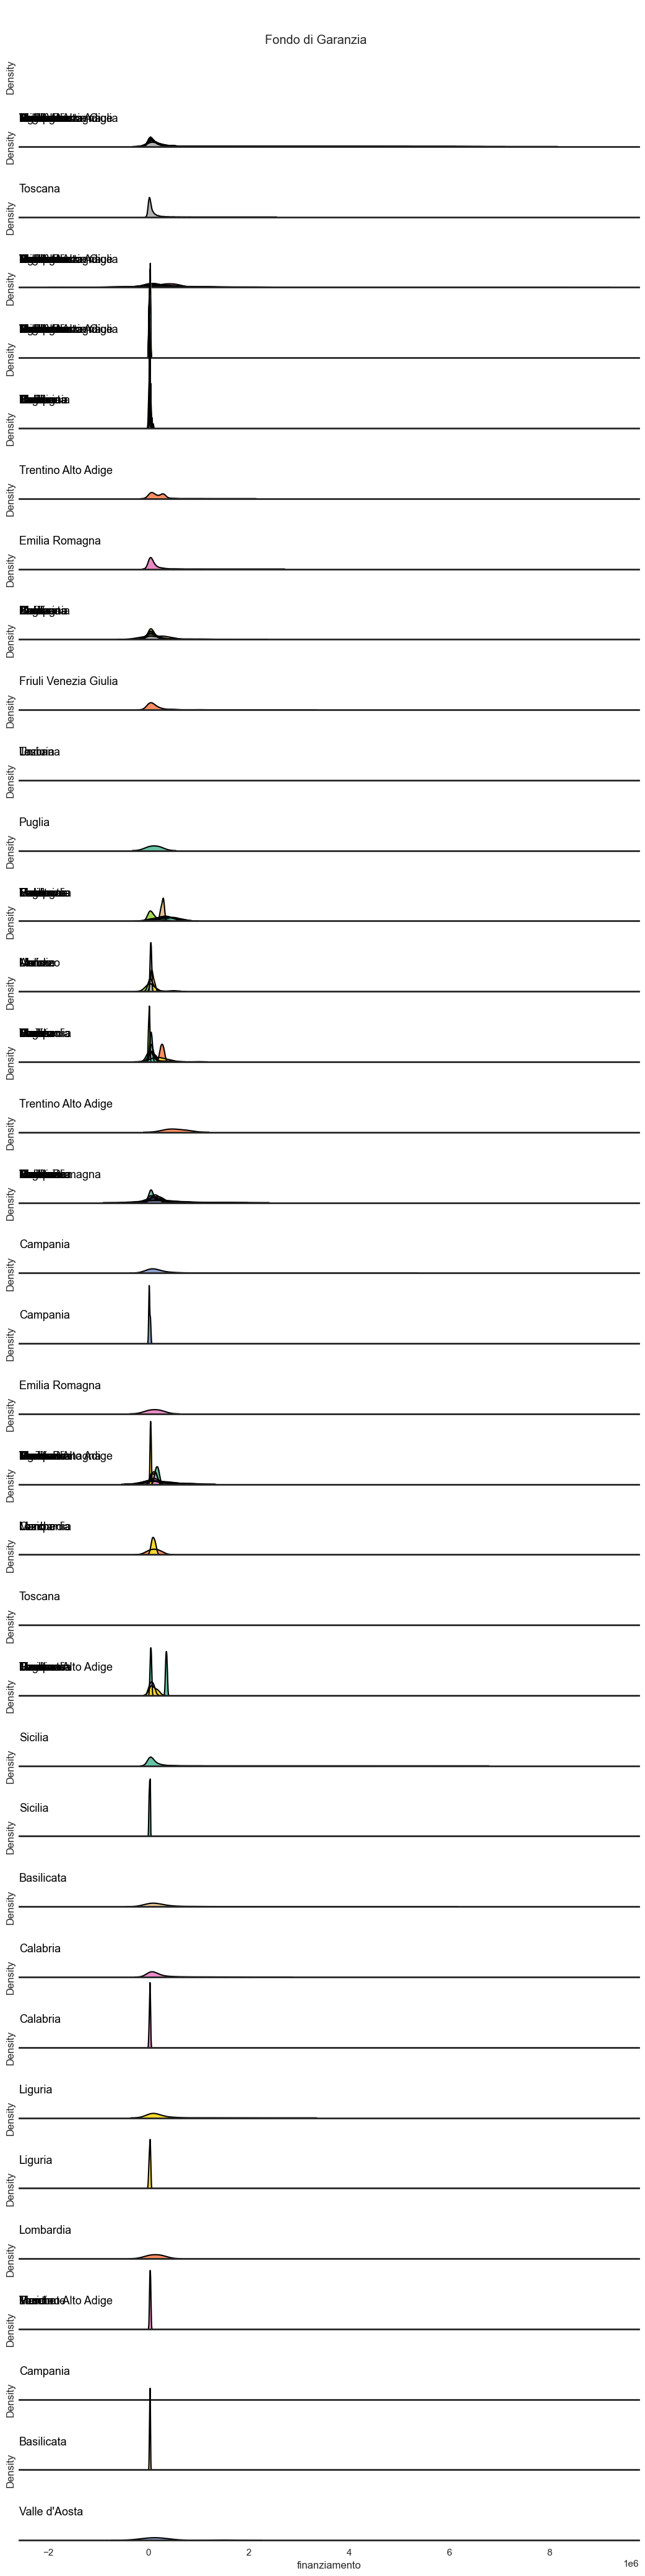

In [20]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df, palette=palette, row="riserva", hue="regione", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="finanziamento", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="finanziamento", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "riserva")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="finanziamento")
g.despine( left=True)
plt.suptitle('Fondo di Garanzia', y=0.98)

Text(0.5, 0.98, 'Fondo di Garanzia')

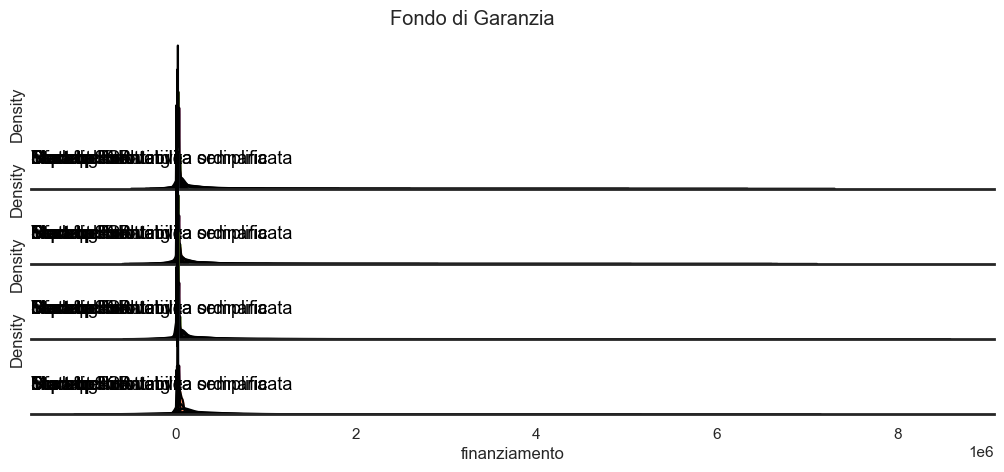

In [21]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df, palette=palette, row="settore", hue="processo", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="finanziamento", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="finanziamento", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "processo")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="finanziamento")
g.despine( left=True)
plt.suptitle('Fondo di Garanzia', y=0.98)

Text(0.5, 0.98, 'Fondo di Garanzia')

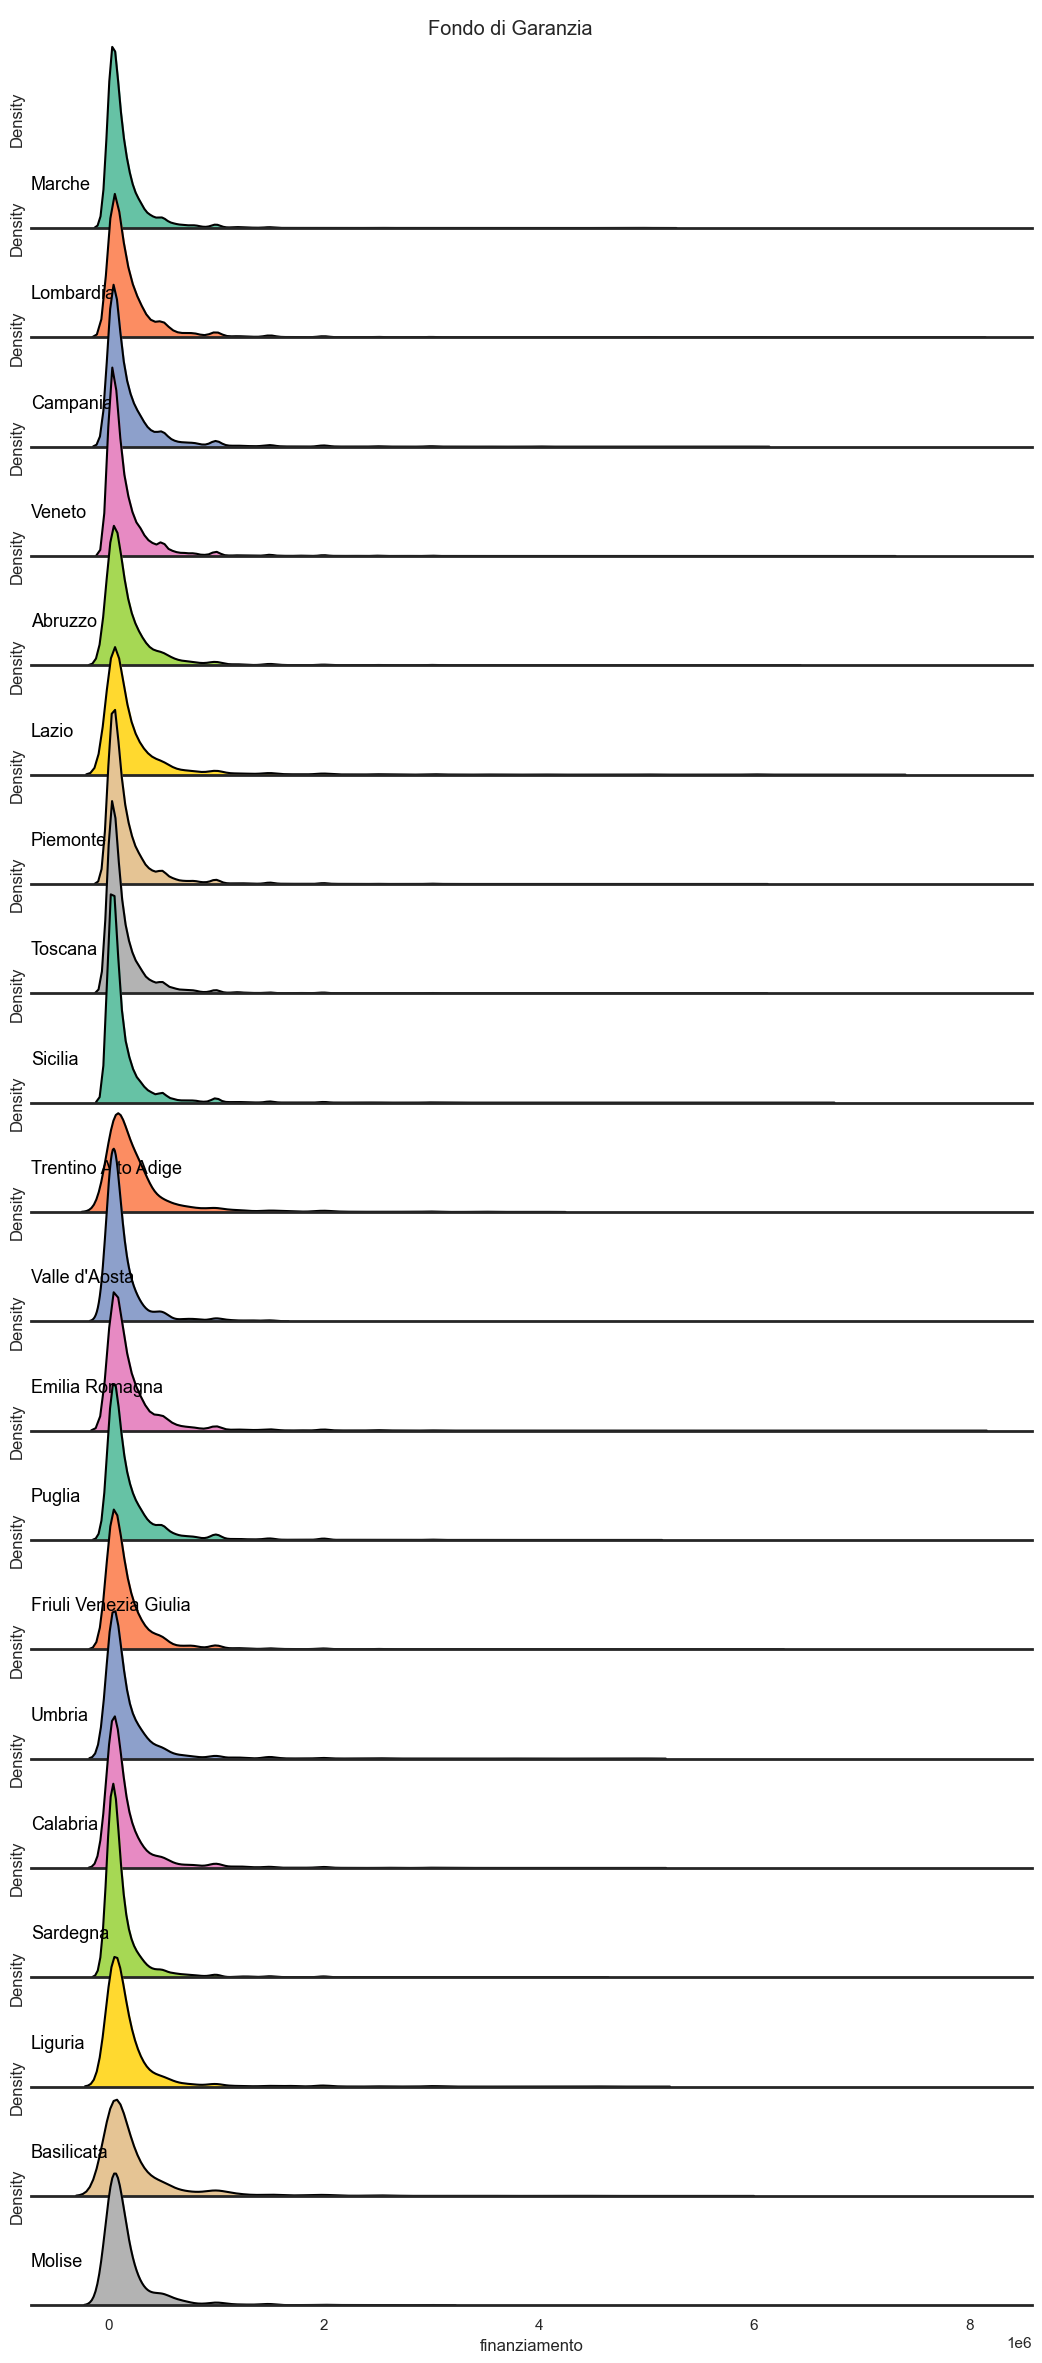

In [23]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df, palette=palette, row="regione", hue="regione", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="finanziamento", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="finanziamento", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "regione")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="finanziamento")
g.despine( left=True)
plt.suptitle('Fondo di Garanzia', y=0.98)

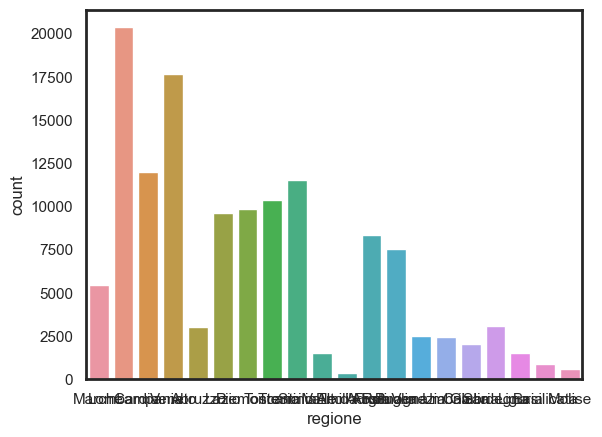

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x='regione', data=df);